In [2]:
import gender_guesser.detector as gender
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
df = pd.read_csv("orders-2018-03-05-20-34-17.csv")
df = df.drop(['Order Status', 'Customer Note',
       'First Name (Billing)', 'Last Name (Billing)', 'Company (Billing)',
       'Address 1&2 (Billing)', 'City (Billing)', 'State Code (Billing)', 'Postcode (Billing)', 'Country Code (Billing)', 'Email (Billing)', 'Phone (Billing)', 'Coupon Code', 'Discount Amount', 'Discount Amount Tax', 'Shipping Method Title', 'Payment Method Title', 'Cart Discount Amount', 'Order Subtotal Amount', 'Order Shipping Amount', 'Order Refund Amount', 'Order Total Tax Amount',], axis=1)
df.head()

,Order Number,Order Date,First Name (Shipping),Last Name (Shipping),Address 1&2 (Shipping),City (Shipping),State Code (Shipping),Postcode (Shipping),Country Code (Shipping),Item #,SKU,Name,Quantity,Item Cost,Order Total Amount
0,6333,2018-03-05 15:15,Jennifer,Williams,1264 Pimlico Dr,Cookeville,TN,38506,US,1,face-clearcreek,Clear Creek Cleanser - 8.5 oz (250mL),1,24.0,175.44
1,6333,2018-03-05 15:15,Jennifer,Williams,1264 Pimlico Dr,Cookeville,TN,38506,US,2,NaN,Watergirl Toner,1,14.0,175.44
2,6333,2018-03-05 15:15,Jennifer,Williams,1264 Pimlico Dr,Cookeville,TN,38506,US,3,NaN,Flower Power Eye Creme,1,23.0,175.44
3,6333,2018-03-05 15:15,Jennifer,Williams,1264 Pimlico Dr,Cookeville,TN,38506,US,4,NaN,Standing Fern and Cornblossom Red Oil,1,25.0,175.44
4,6333,2018-03-05 15:15,Jennifer,Williams,1264 Pimlico Dr,Cookeville,TN,38506,US,5,face-sloppykiss,Sloppy Kiss Facial Moisturizer,1,18.0,175.44


In [4]:
def first(a):
    return a[0]

df.groupby('Order Number').first().sort_values('Order Date', ascending=False).head()

,Order Date,First Name (Shipping),Last Name (Shipping),Address 1&2 (Shipping),City (Shipping),State Code (Shipping),Postcode (Shipping),Country Code (Shipping),Item #,SKU,Name,Quantity,Item Cost,Order Total Amount
Order Number,,,,,,,,,,,,,,
6333,2018-03-05 15:15,Jennifer,Williams,1264 Pimlico Dr,Cookeville,TN,38506,US,1,face-clearcreek,Clear Creek Cleanser - 8.5 oz (250mL),1,24.0,175.44
6328,2018-03-01 21:31,Janet,Sale,704 Potters Falls Rd.,Wartburg,TN,37887,US,1,PS-musclefever,Muscle Fever,1,15.0,41.37
6327,2018-03-01 13:30,Barbara,Smith,1140 Glades Road,Sunbright,TN,37872,US,1,NaN,Standing Fern and Cornblossom Red Oil,1,25.0,32.65
6326,2018-03-01 04:53,Darrell,Beeler,426 North Roane St,Harriman,TN,37748,US,1,NaN,Standing Fern and Cornblossom Red Oil,1,25.0,32.65
6324,2018-02-28 16:24,Kimberly,Gullett,1195 Dearing Rd,Memphis,TN,38117,US,1,face-naturegirl,Nature Girl Facial Scrub,1,19.0,66.44


In [5]:
df['Customer Hash'] = df['First Name (Shipping)'] + df['Last Name (Shipping)'] + df['Postcode (Shipping)']
df['Customer Hash'] = df['Customer Hash'].apply(hash)

In [6]:
number_of_orders = df.groupby('Customer Hash')['Order Number'].count().values
counts = Counter(number_of_orders)
repeats = 1 - (counts[1] / sum(counts.values()))
print(repeats)

0.6629464285714286


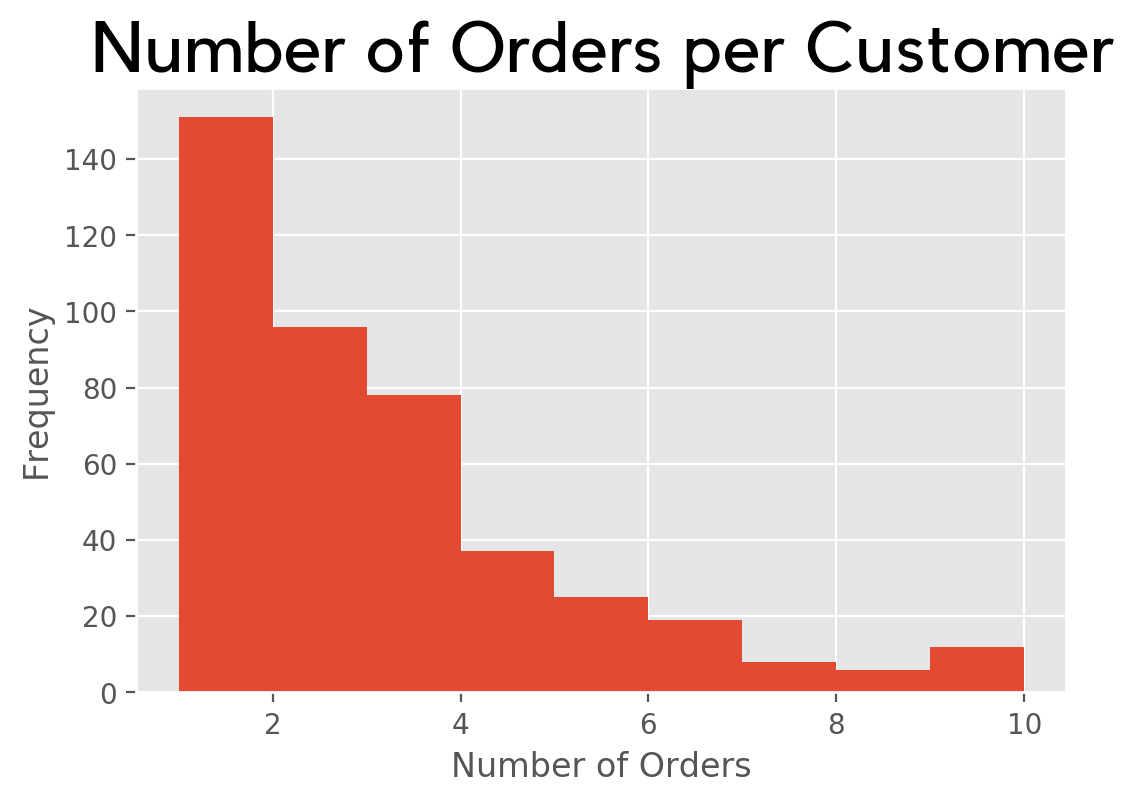

In [26]:
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.hist(number_of_orders, bins=[1,2,3,4,5,6,7,8,9,10])
plt.title("Number of Orders per Customer", fontsize=24, fontname='Pier Sans')
plt.ylabel("Frequency")
plt.xlabel("Number of Orders")
plt.show()

## Gender Breakdown

In [8]:
d = gender.Detector()

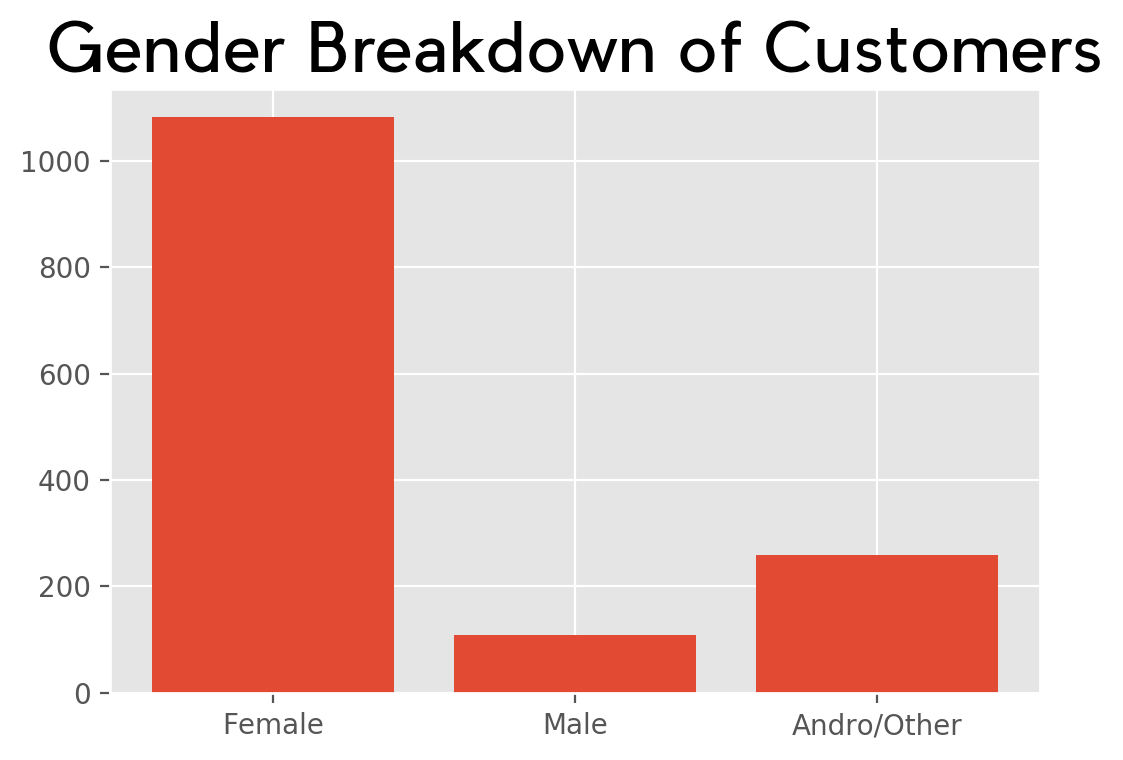

In [28]:
df['Gender'] = df['First Name (Shipping)'].apply(d.get_gender)

def compress_gender(x):
    if x in ['female', 'mostly_female']:
        return 'F'
    elif x in ['male', 'mostly_male']:
        return 'M'
    else:
        return 'A'

df['Gender'] = df['Gender'].apply(compress_gender)

gender_dict = Counter(df['Gender'].values)

plt.figure(dpi=200)
plt.bar(range(len(gender_dict)), list(gender_dict.values()), align='center')
plt.xticks(range(len(gender_dict)), ['Female', 'Male', 'Andro/Other'])
plt.title("Gender Breakdown of Customers", fontsize=24, fontname='Pier Sans')
plt.show()